## Data Attributes

|Attribute|Description|
|:---------:|:-----------:|
|popularity|	Each model builds their popularity value slightly differently. For movies: Number of votes for the day, number of views for the day, number of users who marked it as a "favourite" for the day, number of users who added it to their "watchlist" for the day, release date, number of total votes, previous days score |
|budget| The money spend on production process|
|revenue| Earned money from the film|
|original_title| The title of the film|
|director|	The director of the film|
|genres| All genres accepted for the film|
|release_year| The release year of the film|

## Questions related to this data

* Q1: Which movies are the top 5 profitable of all the time?

* Q2: Is there any relationship between the popularity and the budget?

* Q3: Which movie has the highest budget and which one has the lowest?  

* Q4: Which movie genre has the highest production cost? 

* Q5: Which genres are popular?  

* Q6: What is the most frequent genres type?

* Q7: Who is the most frequently filmed Director?

* Q8: What is the relationship between budget, profit, popularity and revenue of films?


# Import Packages

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

# Gathering Data 

In [2]:
df = pd.read_csv('data/tmdb-movies.csv')

# Assessing Data 

* number of samples in each dataset : *10866*
* number of columns in each dataset : *21*

In [3]:
df.shape

(10866, 21)

* features with missing values : ('imdb_id', 'cast', 'homepage', 'director', 'tagline', 'keywords', 'overview', 'genres', 'production_companies')

In [4]:
df.isnull().any() 

id                      False
imdb_id                  True
popularity              False
budget                  False
revenue                 False
original_title          False
cast                     True
homepage                 True
director                 True
tagline                  True
keywords                 True
overview                 True
runtime                 False
genres                   True
production_companies     True
release_date            False
vote_count              False
vote_average            False
release_year            False
budget_adj              False
revenue_adj             False
dtype: bool

In [5]:
df.isnull().sum()

id                         0
imdb_id                   10
popularity                 0
budget                     0
revenue                    0
original_title             0
cast                      76
homepage                7930
director                  44
tagline                 2824
keywords                1493
overview                   4
runtime                    0
genres                    23
production_companies    1030
release_date               0
vote_count                 0
vote_average               0
release_year               0
budget_adj                 0
revenue_adj                0
dtype: int64

* duplicate rows : 1

In [6]:
df.duplicated().any()

True

In [7]:
df.duplicated().sum()

1

* number of non-null unique values for features : 

In [8]:
df.nunique()

id                      10865
imdb_id                 10855
popularity              10814
budget                    557
revenue                  4702
original_title          10571
cast                    10719
homepage                 2896
director                 5067
tagline                  7997
keywords                 8804
overview                10847
runtime                   247
genres                   2039
production_companies     7445
release_date             5909
vote_count               1289
vote_average               72
release_year               56
budget_adj               2614
revenue_adj              4840
dtype: int64

* data types of columns:

In [9]:
df.dtypes

id                        int64
imdb_id                  object
popularity              float64
budget                    int64
revenue                   int64
original_title           object
cast                     object
homepage                 object
director                 object
tagline                  object
keywords                 object
overview                 object
runtime                   int64
genres                   object
production_companies     object
release_date             object
vote_count                int64
vote_average            float64
release_year              int64
budget_adj              float64
revenue_adj             float64
dtype: object

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    10866 non-null  int64  
 1   imdb_id               10856 non-null  object 
 2   popularity            10866 non-null  float64
 3   budget                10866 non-null  int64  
 4   revenue               10866 non-null  int64  
 5   original_title        10866 non-null  object 
 6   cast                  10790 non-null  object 
 7   homepage              2936 non-null   object 
 8   director              10822 non-null  object 
 9   tagline               8042 non-null   object 
 10  keywords              9373 non-null   object 
 11  overview              10862 non-null  object 
 12  runtime               10866 non-null  int64  
 13  genres                10843 non-null  object 
 14  production_companies  9836 non-null   object 
 15  release_date       

In [11]:
df.original_title

0                      Jurassic World
1                  Mad Max: Fury Road
2                           Insurgent
3        Star Wars: The Force Awakens
4                           Furious 7
                     ...             
10861              The Endless Summer
10862                      Grand Prix
10863             Beregis Avtomobilya
10864          What's Up, Tiger Lily?
10865        Manos: The Hands of Fate
Name: original_title, Length: 10866, dtype: object

> Relase years : 1960-2015 

In [12]:
df.release_year.unique()

array([2015, 2014, 1977, 2009, 2010, 1999, 2001, 2008, 2011, 2002, 1994,
       2012, 2003, 1997, 2013, 1985, 2005, 2006, 2004, 1972, 1980, 2007,
       1979, 1984, 1983, 1995, 1992, 1981, 1996, 2000, 1982, 1998, 1989,
       1991, 1988, 1987, 1968, 1974, 1975, 1962, 1964, 1971, 1990, 1961,
       1960, 1976, 1993, 1967, 1963, 1986, 1973, 1970, 1965, 1969, 1978,
       1966])

> `profit` is calculated by revenue - budget.

In [13]:
df['profit']= df['revenue'] - df['budget']

In [14]:
df['profit']

0        1363528810
1         228436354
2         185238201
3        1868178225
4        1316249360
            ...    
10861             0
10862             0
10863             0
10864             0
10865        -19000
Name: profit, Length: 10866, dtype: int64

> Checking for the zeros in budget and revenue to prevent inappropriate results. 

In [15]:
df[df['budget']==0].shape[0]

5696

In [16]:
df[df['revenue']==0].shape[0]

6016

In [17]:
df[df['budget']!=0] #I will use not 0s.

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj,profit
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09,1363528810
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08,228436354
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08,185238201
3,140607,tt2488496,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,http://www.starwars.com/films/star-wars-episod...,J.J. Abrams,Every generation has a story.,...,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/15,5292,7.5,2015,1.839999e+08,1.902723e+09,1868178225
4,168259,tt2820852,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,http://www.furious7.com/,James Wan,Vengeance Hits Home,...,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/15,2947,7.3,2015,1.747999e+08,1.385749e+09,1316249360
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10835,5923,tt0060934,0.299911,12000000,20000000,The Sand Pebbles,Steve McQueen|Richard Attenborough|Richard Cre...,NaN,Robert Wise,This is the heroic story of the men on the U.S...,...,182,Action|Adventure|Drama|War|Romance,Twentieth Century Fox Film Corporation|Solar P...,12/20/66,28,7.0,1966,8.061618e+07,1.343603e+08,8000000
10841,42701,tt0062262,0.264925,75000,0,The Shooting,Will Hutchins|Millie Perkins|Jack Nicholson|Wa...,NaN,Monte Hellman,"Suspenseful desert pursuit in the ""High Noon"" ...",...,82,Western,Proteus Films,10/23/66,12,5.5,1966,5.038511e+05,0.000000e+00,-75000
10848,2161,tt0060397,0.207257,5115000,12000000,Fantastic Voyage,Stephen Boyd|Raquel Welch|Edmond O'Brien|Donal...,NaN,Richard Fleischer,A Fantastic and Spectacular Voyage... Through ...,...,100,Adventure|Science Fiction,Twentieth Century Fox Film Corporation,8/24/66,42,6.7,1966,3.436265e+07,8.061618e+07,6885000
10855,13343,tt0059221,0.141026,700000,0,The Ghost & Mr. Chicken,Don Knotts|Joan Staley|Liam Redmond|Dick Sarge...,NaN,Alan Rafkin,G-G-GUARANTEED! YOU'LL BE SCARED UNTIL YOU LAU...,...,90,Comedy|Family|Mystery|Romance,Universal Pictures,1/20/66,14,6.1,1966,4.702610e+06,0.000000e+00,-700000


In [18]:
df[df['revenue']!=0] #I will use not 0s.

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj,profit
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09,1363528810
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08,228436354
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08,185238201
3,140607,tt2488496,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,http://www.starwars.com/films/star-wars-episod...,J.J. Abrams,Every generation has a story.,...,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/15,5292,7.5,2015,1.839999e+08,1.902723e+09,1868178225
4,168259,tt2820852,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,http://www.furious7.com/,James Wan,Vengeance Hits Home,...,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/15,2947,7.3,2015,1.747999e+08,1.385749e+09,1316249360
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10822,396,tt0061184,0.670274,7500000,33736689,Who's Afraid of Virginia Woolf?,Elizabeth Taylor|Richard Burton|George Segal|S...,NaN,Mike Nichols,You are cordially invited to George and Martha...,...,131,Drama,Chenault Productions,6/21/66,74,7.5,1966,5.038511e+07,2.266436e+08,26236689
10828,5780,tt0061107,0.402730,3000000,13000000,Torn Curtain,Paul Newman|Julie Andrews|Lila Kedrova|HansjÃ¶...,NaN,Alfred Hitchcock,It tears you apart with suspense!,...,128,Mystery|Thriller,Universal Pictures,7/13/66,46,6.3,1966,2.015404e+07,8.733419e+07,10000000
10829,6644,tt0061619,0.395668,4653000,6000000,El Dorado,John Wayne|Robert Mitchum|James Caan|Charlene ...,NaN,Howard Hawks,It's the Big One with the Big Two,...,120,Action|Western,Paramount Pictures|Laurel Productions,12/17/66,36,6.9,1966,3.125892e+07,4.030809e+07,1347000
10835,5923,tt0060934,0.299911,12000000,20000000,The Sand Pebbles,Steve McQueen|Richard Attenborough|Richard Cre...,NaN,Robert Wise,This is the heroic story of the men on the U.S...,...,182,Action|Adventure|Drama|War|Romance,Twentieth Century Fox Film Corporation|Solar P...,12/20/66,28,7.0,1966,8.061618e+07,1.343603e+08,8000000


# Cleaning Column Labels

I will drop the columns I do not need for this analysis which are: (`imdb_id`, `homepage`, `tagline`, `keywords`, `overview`, `runtime`, `production_companies`, `release_date`, `budget_adj`, `revenue_adj`)

In [19]:
df.drop(['imdb_id','homepage','tagline','keywords','overview','runtime', 'production_companies', 'release_date', 'budget_adj', 'revenue_adj'],axis =1 ,inplace=True)

In [20]:
df.head()

,id,popularity,budget,revenue,original_title,cast,director,genres,vote_count,vote_average,release_year,profit
0,135397,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,Action|Adventure|Science Fiction|Thriller,5562,6.5,2015,1363528810
1,76341,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,George Miller,Action|Adventure|Science Fiction|Thriller,6185,7.1,2015,228436354
2,262500,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,Robert Schwentke,Adventure|Science Fiction|Thriller,2480,6.3,2015,185238201
3,140607,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,J.J. Abrams,Action|Adventure|Science Fiction|Fantasy,5292,7.5,2015,1868178225
4,168259,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,James Wan,Action|Crime|Thriller,2947,7.3,2015,1316249360


# Data Cleaning

## Replace Zero Values with Null Values for Budget & Revenue

In [21]:
df['budget'] = df['budget'].replace(0, np.NaN)
df['revenue'] = df['revenue'].replace(0, np.NaN)

In [22]:
df[df['budget']==0].shape[0] #Checking

0

In [23]:
df[df['revenue']==0].shape[0] #Checking

0

## Drop Nulls

In [24]:
df = df.dropna(subset=['cast', 'director', 'genres', 'budget', 'revenue'])

In [25]:
df.isnull().sum().any()

False

## Drop Duplicates

df = df.drop_duplicates()

In [26]:
df.duplicated().sum().any()

True

# EDA  &  *Answers*

## Q1: Which movies are the top 5 profitable of all the time?

In [27]:
df.columns

Index(['id', 'popularity', 'budget', 'revenue', 'original_title', 'cast',
       'director', 'genres', 'vote_count', 'vote_average', 'release_year',
       'profit'],
      dtype='object')

In [28]:
type(df['profit'])

pandas.core.series.Series

In [29]:
df = df.sort_values(by=['profit'], ascending=False)

In [30]:
x = list(df['original_title'].head(10))
y = list(df['profit'].head(10))

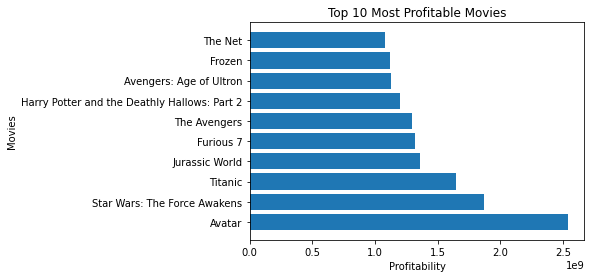

In [31]:
plt.barh(x,y)
plt.title('Top 10 Most Profitable Movies')
plt.ylabel('Movies')
plt.xlabel('Profitability')
plt.show()

## A1: 

`
1 - Avatar
2- Star Wars:The Force Awakens
3- Titanic
4- Jurassic World
5- Furious 7.`

## Q2: Is there any relationship between the popularity and the budget?

### A2: Correlation check.

In [32]:
correlation = df["popularity"].corr(df["budget"])

correlation 

0.4465702124386731

> The correlation between `popularity` and `budget` is 0.4465. It is not close to 1 enough to be in a strong relation. I assume that there is no significant relation between them.

### A2:  Plotting profit vs budget

Text(0.5, 1.0, 'Profit vs Budget for movies')

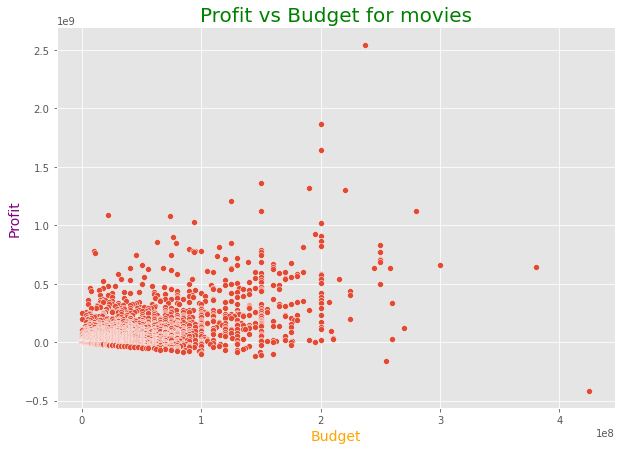

In [33]:
plt.style.use("ggplot")
plt.figure(figsize=[10,7])
sns.scatterplot(data=df,x="budget",y="profit");
plt.xlabel("Budget",fontdict={'fontsize': 14, 'fontweight' : 5, 'color' : 'Orange'})
plt.ylabel("Profit",fontdict={'fontsize': 14, 'fontweight' : 5, 'color' : 'Purple'})
plt.title("Profit vs Budget for movies",fontdict={'fontsize': 20, 'fontweight' : 5, 'color' : 'Green'})

> Also, comparison graph cleary shows that there's no relation between the profit and budget.

## Q3: Which movie has the highest budget and which one has the lowest?  

### A3: The movie with the highest budget : 
> Avatar.

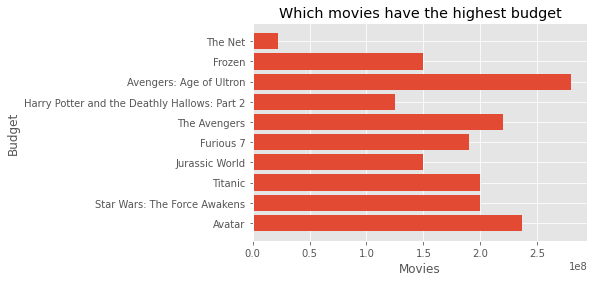

In [34]:
x = list(df['original_title'].head(10))
y = list(df['budget'].head(10))
plt.barh(x,y)
plt.title('Which movies have the highest budget')
plt.ylabel('Budget')
plt.xlabel('Movies')
plt.show()

### A3: The movie with the lowest budget: 
> Charlotte's Web.

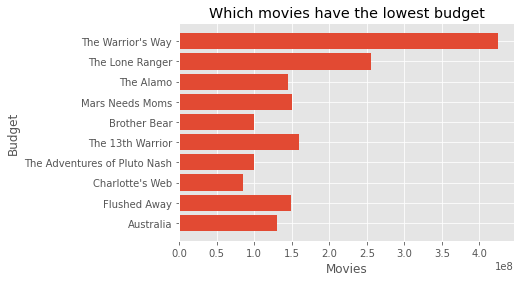

In [35]:
x = list(df['original_title'].tail(10))
y = list(df['budget'].tail(10))
plt.barh(x,y)
plt.title('Which movies have the lowest budget')
plt.ylabel('Budget')
plt.xlabel('Movies')
plt.show()

## Q4: Which movie genre has the highest production cost? 

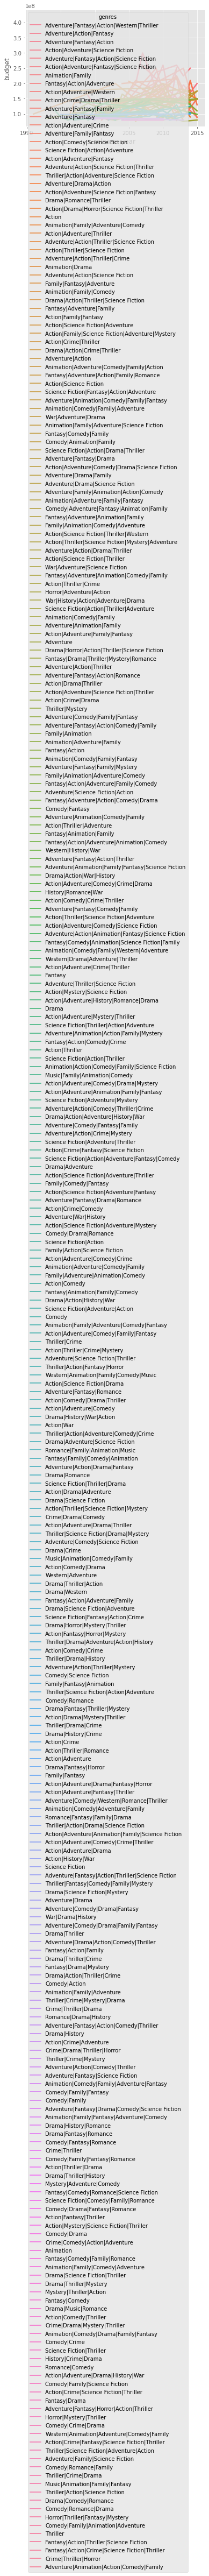

In [36]:
data = df.sort_values(by='budget', ascending=False)
x = sns.lineplot(data=data.head(500), x="release_year", y="budget", hue="genres", err_style="bars", ci=10, linewidth=2.5)

### A4:
> The combination of 'Advanture|Fantasy|Action|Western|Thriller' has the highest production cost.

> *P.S.*: I did not split genres' types cause their avarages are really close when they separeted. So that, split this combinations would only make this variable useless. 
Moreover, films have more than one genres in real life, in my view, it is more realistic and true to hold them as they are. BUT, I will split them even if I thought as unlogical, I need more clear results.

### Quick check for the information from the graph above. 

In [37]:
data1 = df.sort_values(by='budget', ascending=False)

expensive_genres = data1.loc[df["budget"] > 0.798343, "genres"]

expensive_genres.head(20)

2244    Adventure|Fantasy|Action|Western|Thriller
3375                     Adventure|Action|Fantasy
7387                     Adventure|Fantasy|Action
14               Action|Adventure|Science Fiction
6570     Adventure|Fantasy|Action|Science Fiction
4411     Action|Adventure|Fantasy|Science Fiction
1929                             Animation|Family
7394                     Fantasy|Action|Adventure
5508                     Action|Adventure|Western
4363                  Action|Crime|Drama|Thriller
643      Action|Adventure|Fantasy|Science Fiction
1389                     Adventure|Fantasy|Family
1923                     Adventure|Fantasy|Family
634                             Adventure|Fantasy
5431                            Adventure|Fantasy
4367                     Adventure|Fantasy|Action
10                         Action|Adventure|Crime
1386     Action|Adventure|Fantasy|Science Fiction
5432     Action|Adventure|Fantasy|Science Fiction
2902                     Adventure|Family|Fantasy


**Looks alright!**

## Q5: Which genres are popular?  

### A5: 

To answer this question, first of all I asked this question: *How can you know it is popular? Is it top 10? Or top 5? Or average?*

> I preferred to use **median** to select only popular ones. For quick review I am adding what is median to explain my reason of use it. 

`**The median** is the middle score for a set of data that has been arranged in order of magnitude. The median is less affected by outliers and skewed data.`

In [38]:
df.popularity.median()

0.798343

In [39]:
data2 = df.sort_values(by='popularity', ascending=False)

popular_genre = data2.loc[df["popularity"] > 0.798343, "genres"]

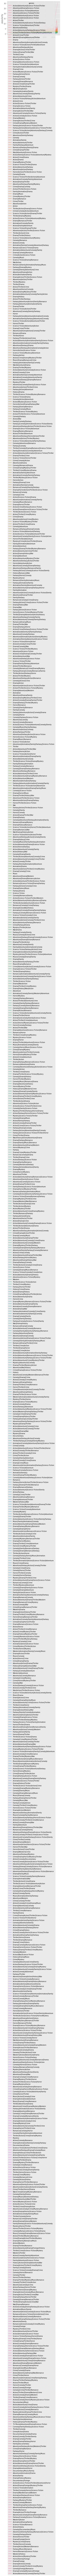

In [40]:
x = sns.lineplot(data=data2, x="release_year", y="popularity", hue="genres", err_style="bars", ci=10, linewidth=0.5)

> This is not a good visual. There're so many types of genres and it's hard to see the whole graph for analyzing. Though, 'Action|Adventure|Science Fiction|Thriller' genre is the most popular today.

### Quick check the info and let's try to diminish the #of genres to reach some more.

In [41]:
popular_genre.head(20)

0               Action|Adventure|Science Fiction|Thriller
1               Action|Adventure|Science Fiction|Thriller
629                       Adventure|Drama|Science Fiction
630                      Action|Science Fiction|Adventure
2                      Adventure|Science Fiction|Thriller
631                      Action|Adventure|Science Fiction
1329                     Adventure|Action|Science Fiction
632                                       Action|Thriller
3                Action|Adventure|Science Fiction|Fantasy
633                    Science Fiction|Adventure|Thriller
634                                     Adventure|Fantasy
1386             Action|Adventure|Fantasy|Science Fiction
1919    Action|Thriller|Science Fiction|Mystery|Adventure
4                                   Action|Crime|Thriller
5                        Western|Drama|Adventure|Thriller
2409                                                Drama
635              Adventure|Family|Animation|Action|Comedy
6             

# Q6: To reach some more info about genres, what is the most frequent type?
## A6: Find the most frequent genre over years. (1)
> Drama.

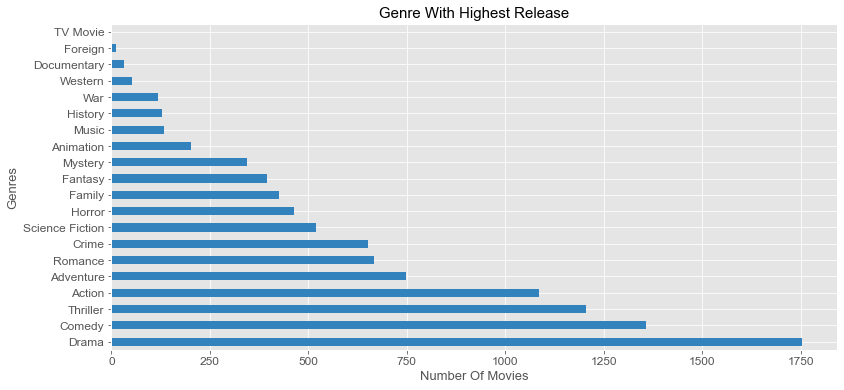

In [42]:
def count_genre(x):

    data_plot = df[x].str.cat(sep = '|')
    data = pd.Series(data_plot.split('|'))

    info = data.value_counts(ascending=False)
    return info

total_genre_movies = count_genre('genres')
total_genre_movies.plot(kind= 'barh',figsize = (13,6),fontsize=12,colormap='tab20c')

plt.title("Genre With Highest Release",fontsize=15)
plt.xlabel('Number Of Movies',fontsize=13)
plt.ylabel("Genres",fontsize= 13)
sns.set_style("whitegrid")

## A6: Find the most frequent genre over years. (2)

In [43]:
from sklearn.feature_extraction.text import CountVectorizer
temp = df.genres.dropna()
vec = CountVectorizer(token_pattern='(?u)\\b[\\w-]+\\b', analyzer='word').fit(temp)
bag_of_genres = vec.transform(temp)
unique_genres =  vec.get_feature_names()
np.array(unique_genres)

array(['action', 'adventure', 'animation', 'comedy', 'crime',
       'documentary', 'drama', 'family', 'fantasy', 'fiction', 'foreign',
       'history', 'horror', 'movie', 'music', 'mystery', 'romance',
       'science', 'thriller', 'tv', 'war', 'western'], dtype='<U11')

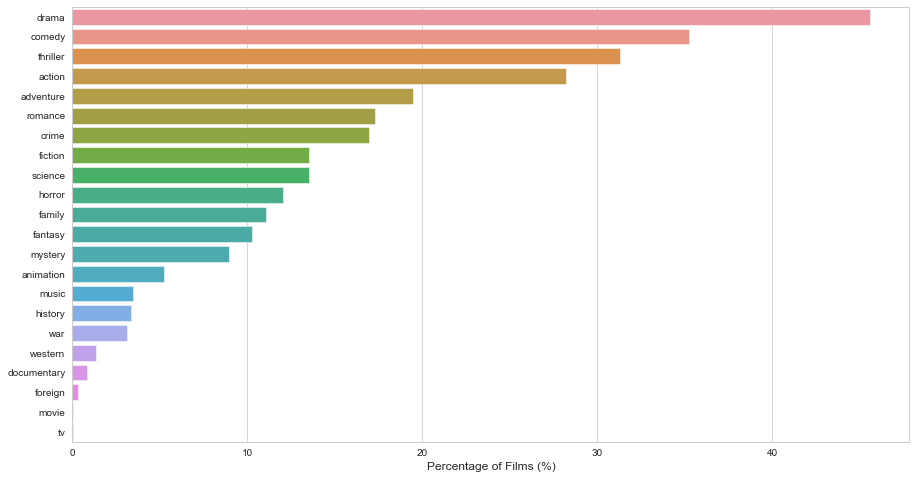

In [44]:
genres = pd.DataFrame(bag_of_genres.todense(),columns=unique_genres,index=temp.index)
sorted_genres_perc = 100*pd.Series(genres.sum()).sort_values(ascending=False)/genres.shape[0]
plt.figure(figsize=(15,8))
sns.barplot(x=sorted_genres_perc.values,y=sorted_genres_perc.index,orient="h")
plt.xlabel("Percentage of Films (%)")
plt.show()

## A6: Find the most popular genre over years (1)

> Action, Drama, Thriller.

In [58]:
genre_details = list(map(str,(df['genres'])))
genre = ['Adventure', 'Science Fiction', 'Fantasy', 'Crime', 'Western', 'Family','nan', 'Animation','War','Mystery','Romance','TV Movie','Action', 'Thriller','Comedy','Drama' , 'History', 'Music', 'Horror', 'Documentary', 'Foreign']
year = np.array(df['release_year'])
popularity = np.array(df['popularity'])


popularity_df = pd.DataFrame(index = genre, columns = range(1960, 2016))

popularity_df = popularity_df.fillna(value = 0.0)

z = 0
for i in genre_details:
    split_genre = list(map(str,i.split('|')))
    popularity_df.loc[split_genre, year[z]] = popularity_df.loc[split_genre, year[z]] + popularity[z]
    z+=1


In [57]:
def calculate_std(x):
    return (x-x.mean())/x.std(ddof=0)

popular_genre = calculate_std(popularity_df)
popular_genre.head()

,1960,1961,1962,1963,1964,1965,1966,1967,1968,1969,...,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015
Adventure,0.705931,1.437183,2.710171,1.923461,1.022476,1.665470,1.132612,2.442594,2.298155,1.999674,...,0.900711,0.708766,1.144677,1.369903,1.424681,0.922247,1.173951,1.315606,1.641152,1.891133
Science Fiction,-0.717114,-0.762280,-0.623943,-0.750602,-0.911998,-0.781827,0.029983,-0.831207,1.984656,-0.686877,...,-0.259892,-0.373350,0.200644,0.989288,0.048719,0.398418,0.396914,0.805604,1.256819,1.437719
Fantasy,-0.717114,-0.762280,-0.623943,-0.750602,0.307291,-0.781827,-0.732002,-0.715169,-0.711085,-0.686877,...,0.190496,0.584454,0.059816,0.312279,0.300059,0.212083,0.309076,0.008322,0.031096,-0.300706
Crime,-0.717114,-0.177595,-0.068337,-0.750602,-0.505053,-0.781827,-0.732002,0.474892,-0.240488,0.835902,...,0.135996,0.434044,0.491164,-0.470769,-0.050896,0.117937,0.168556,0.500124,-0.327002,0.069980
Western,0.705931,-0.649446,0.084050,-0.750602,-0.911998,-0.781827,0.722680,-0.831207,-0.339560,1.526871,...,-1.012408,-1.033655,-0.985504,-1.070939,-0.919516,-0.898672,-0.789552,-0.952559,-0.907407,-0.697014


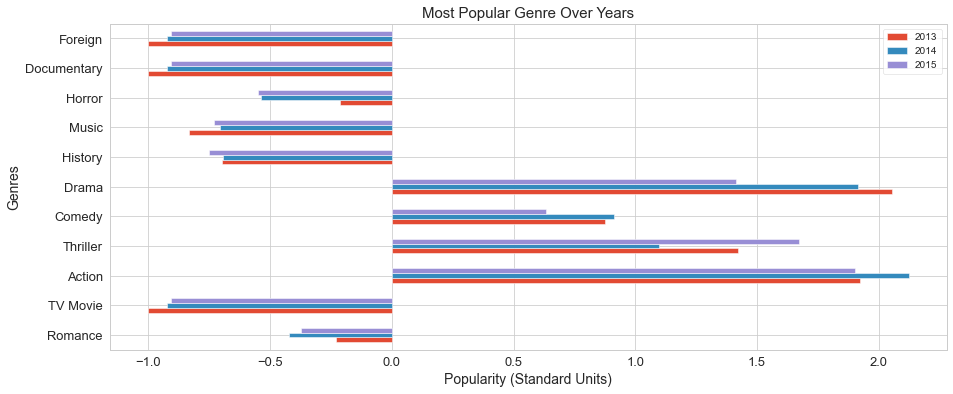

In [56]:
popular_genre.iloc[10:,53:].plot(kind='barh',figsize = (15,6),fontsize=13)

plt.title("Most Popular Genre Over Years",fontsize=15)
plt.xlabel("Popularity (Standard Units)",fontsize=14)
plt.ylabel("Genres",fontsize = 14)
sns.set_style("darkgrid")

## A6: The change in popularities of genres over years (2) - Focused on the change in years

<AxesSubplot:>

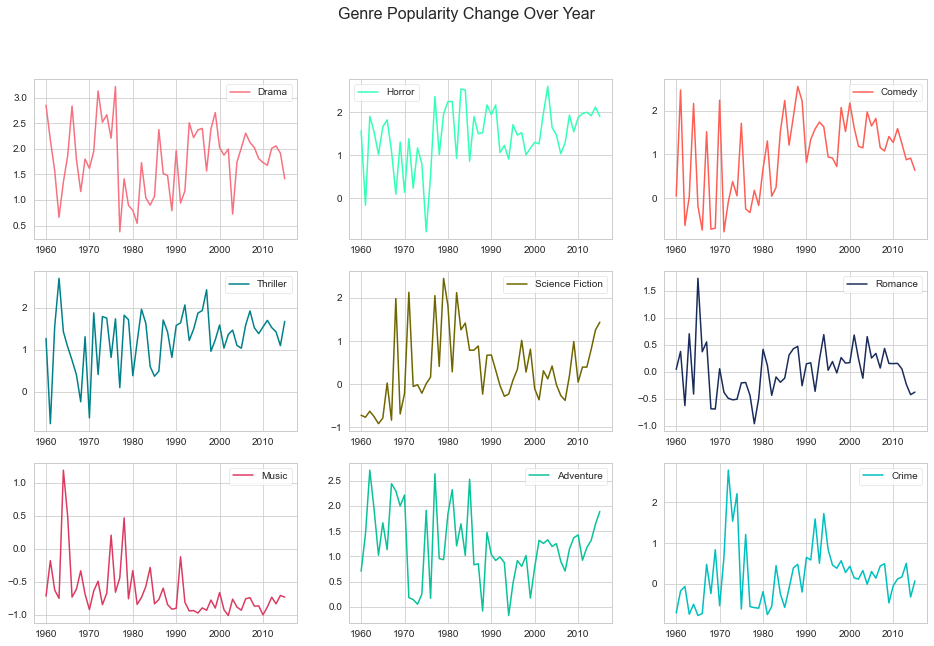

In [55]:
sns.set_style("whitegrid")

fig, ax = plt.subplots(3,3,figsize = (16,10))

fig.suptitle('Genre Popularity Change Over Year',fontsize = 16)

popular_genre.loc['Drama'].plot(label = "Drama",color = '#f67280',ax = ax[0][0],legend=True)
popular_genre.loc['Action'].plot(label = "Horror",color='#33FFB5',ax = ax[0][1],legend=True)
popular_genre.loc['Comedy'].plot(label = "Comedy",color='#fe5f55',ax = ax[0][2],legend=True)
popular_genre.loc['Thriller'].plot(label = "Thriller",color='#00818a',ax = ax[1][0],legend=True)
popular_genre.loc['Science Fiction'].plot(label = "Science Fiction",color='#6f6600',ax = ax[1][1],legend=True)
popular_genre.loc['Romance'].plot(label = "Romance",color='#1a2c5b',ax = ax[1][2],legend=True)
popular_genre.loc['Music'].plot(label = "Music",color='#db3b61',ax = ax[2][0],legend=True)
popular_genre.loc['Adventure'].plot(label = "Adventure",color='#08c299',ax = ax[2][1],legend=True)
popular_genre.loc['Crime'].plot(label = "Crime",color='c',ax = ax[2][2],legend=True)

# Q7: Most Frequent Director?

## A7: 
> Steven Spielberg

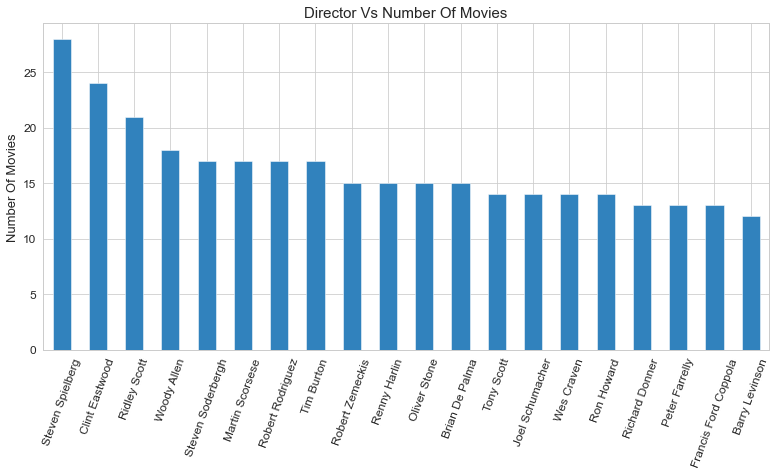

In [49]:
count_director_films = count_genre('director')

count_director_films.iloc[:20].plot.bar(figsize=(13,6),colormap= 'tab20c',fontsize=12)

plt.title("Director Vs Number Of Movies",fontsize=15)
plt.xticks(rotation=70)
plt.ylabel("Number Of Movies",fontsize= 13)
sns.set_style("whitegrid")


# Q8: What is the relationship between budget, profit, popularity and revenue of films?

## A8: 	Interpreting by graph

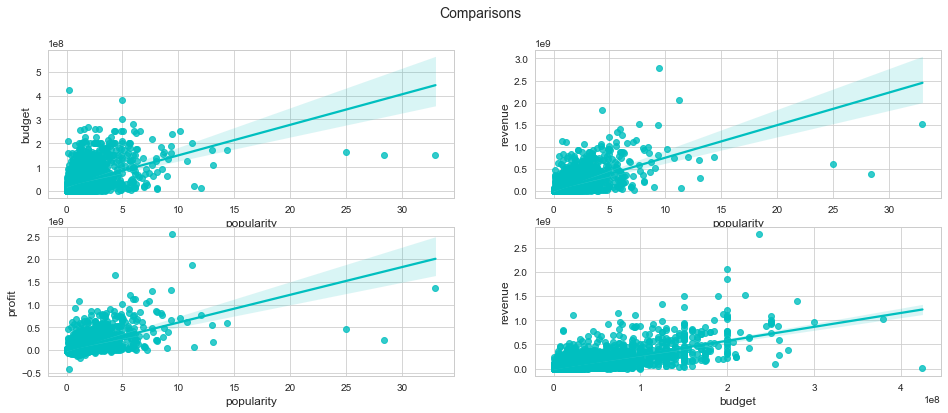

In [54]:
fig, axes = plt.subplots(2,2,figsize = (16,6))
fig.suptitle("Comparisons",fontsize=14)
sns.regplot(x=df['popularity'], y=df['budget'],color='c',ax=axes[0][0])
sns.regplot(x=df['popularity'], y=df['revenue'],color='c',ax=axes[0][1])
sns.regplot(x=df['popularity'], y=df['profit'],color='c',ax=axes[1][0])
sns.regplot(x=df['budget'], y=df['revenue'],color='c',ax=axes[1][1])
sns.set_style("whitegrid")

## A8: Comment on correlation results

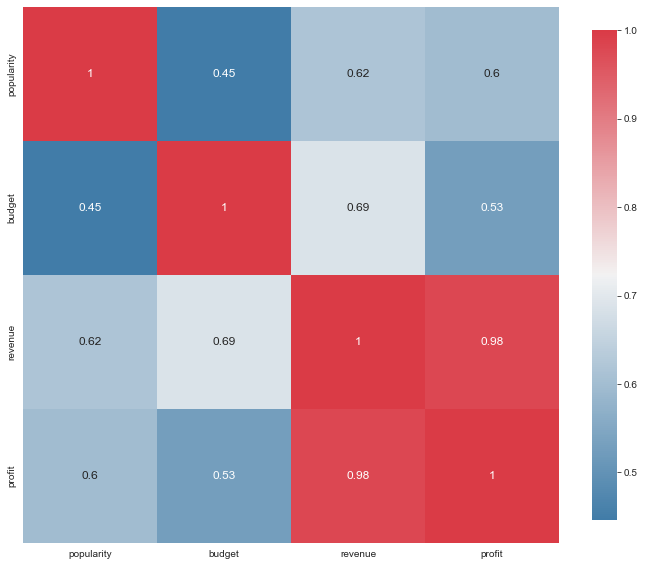

In [51]:
def plot_correlation_map( df ):
    corr = df.corr()
    _ , ax = plt.subplots( figsize =( 12 , 10 ) )
    cmap = sns.diverging_palette( 240 , 10 , as_cmap = True )
    _ = sns.heatmap(corr,cmap = cmap,square=True, cbar_kws={ 'shrink' : .9 }, ax=ax, annot = True, annot_kws = { 'fontsize' : 12 })
plot_correlation_map(df[['popularity','budget','revenue','profit']])

The ones there is a relation between: 
* Revenue & Popularity
* Profit & Popularity
* Revenue & Budget
* Revenue & Profit

All of them was expected.

The ones there is no significant relation between: 
* Budget & Popularity
* Budget & Profit